In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal

In [2]:
params = {
    # exp
    "seed": 0,
    "runs": 2,
    "exp_name": "split_test",
    "split": "random_split", #CV
    "test_split": 0.3,
    "calib_split": 0.1,

    "cv_folds": 5,
    "plot": True,
    "calib_methods": ["RF", "DT"], #, "RF_ens_k", "RF_ens_r", "Platt", "ISO", "Beta", "CRF", "VA"],
    
    "metrics": ["acc", "ece", "logloss", "tce", "BS", "BS2", "CL", "GL", "IL"], 

    #data
    "data_name": "synthetic",
    "plot_data": True,
    "data_size": 20,
    "n_copy": 10,
    "n_features": 20,
    "n_informative": 15, 
    "n_redundant": 5, 
    "n_repeated": 0, 

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 


    # calib param
    "bin_strategy": "uniform",
    "ece_bins": 20,
    "boot_size": 1000,
    "boot_count": 5,

    # RF hyper opt
    "hyper_opt": "Manual", #"Default", "Manual"
    "opt_cv":5, 
    "opt_n_iter":10,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [100],
                    "max_depth": [2,3,4,5,6,7,8,10,15,20,30,40,50,60,100],
                    "criterion": ["gini", "entropy"],
                    "max_features": ["sqrt", "log2"],
                    "min_samples_split": [2,3,4,5],
                    "min_samples_leaf": [1,2,3],
                    "oob_score": [True]
                    },

    # "depth": 4,
    "oob": True,
    "n_estimators": 100,

}

exp_key = "depth"
# exp_values = [2,3,4,5,10,15,20, 25, 30, 35, 40, 45, 50]
exp_values = [2,3,4]

In [3]:
calib_results_dict, data_list = cx.run_exp(exp_key, exp_values, params)
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

len res_list [{'2_RF_prob': array([[0.866, 0.134],
       [0.462, 0.538],
       [0.858, 0.142],
       [0.784, 0.216],
       [0.312, 0.688],
       [0.618, 0.382]]), '2_RF_prob_c': array([[0.916, 0.0836],
       [0.787, 0.213],
       [0.83, 0.17],
       [0.858, 0.142],
       [0.856, 0.144],
       [0.866, 0.134],
       [0.784, 0.216],
       [0.898, 0.102],
       [0.897, 0.103],
       [0.938, 0.0621],
       [0.155, 0.845],
       [0.11, 0.89],
       [0.208, 0.792],
       [0.169, 0.831],
       [0.312, 0.688],
       [0.13, 0.87],
       [0.618, 0.382],
       [0.105, 0.895],
       [0.462, 0.538],
       [0.0778, 0.922]]), '2_DT_prob': array([[1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0]]), '2_DT_prob_c': array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]

In [4]:
tables["tce"]

,RF,DT
Data,,
2,0.076296,0.116465
3,0.074157,0.116465
4,0.074157,0.116465
Mean,0.074870,0.116465
Rank,1.000000,2.000000


In [5]:
tables["tce_std"]

,RF_std,DT_std
Data,,
2,0.010002,0.083333
3,0.009874,0.083333
4,0.009874,0.083333


In [6]:
column_names = tables["tce"].columns.tolist()
temp = tables["tce_std"]
temp.columns = column_names
df1_str = tables["tce"].round(4).astype(str)
df2_str = temp.round(4).astype(str)
res = df1_str + "±" + df2_str
res

,RF,DT
Data,,
2,0.0763±0.01,0.1165±0.0833
3,0.0742±0.0099,0.1165±0.0833
4,0.0742±0.0099,0.1165±0.0833
Mean,NaN,NaN
Rank,NaN,NaN


In [7]:
tables["CL"]

,RF,DT
Data,,
2,0.035271,0.01279
3,0.032597,0.01279
4,0.032597,0.01279
Mean,0.033488,0.01279
Rank,1.000000,2.00000


In [8]:
tables["ece"]

,RF,DT
Data,,
2,0.139449,0.078125
3,0.137385,0.078125
4,0.137385,0.078125
Mean,0.138073,0.078125
Rank,2.000000,1.000000


In [9]:
import scipy.stats as stats
import numpy as np

tce_ranks = np.array(tables["tce"].loc["Rank"])
ece_ranks = np.array(tables["ece"].loc["Rank"])
brier_ranks = np.array(tables["BS"].loc["Rank"])
logloss_ranks = np.array(tables["logloss"].loc["Rank"])
acc_ranks = np.array(tables["acc"].loc["Rank"])

tau, p_value = stats.kendalltau(tce_ranks, brier_ranks)
print(f"tau {tau} p_value {p_value}")

tau -1.0 p_value 1.0


In [10]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF', 'DT']

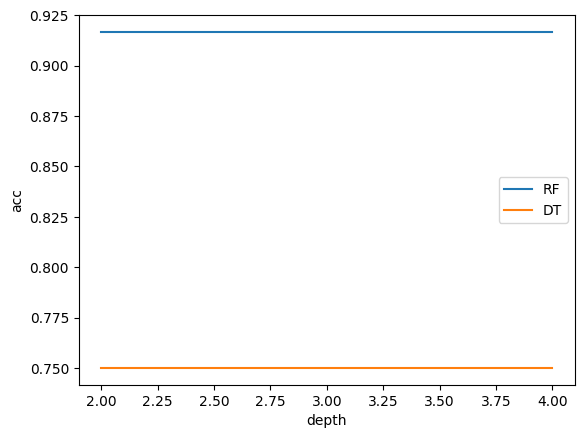

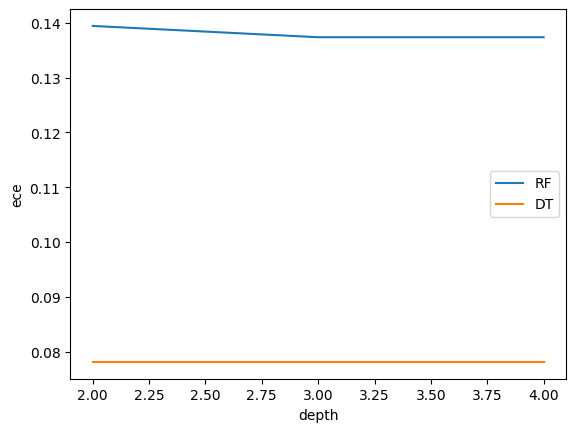

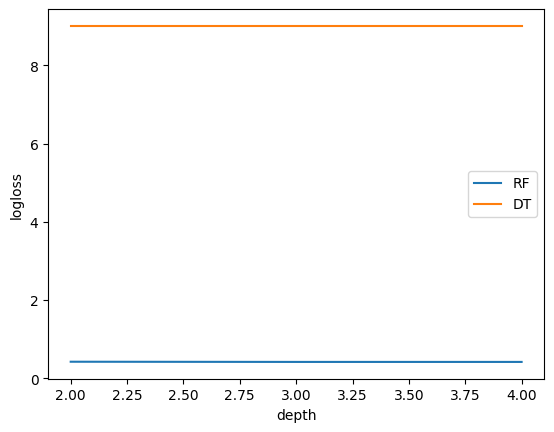

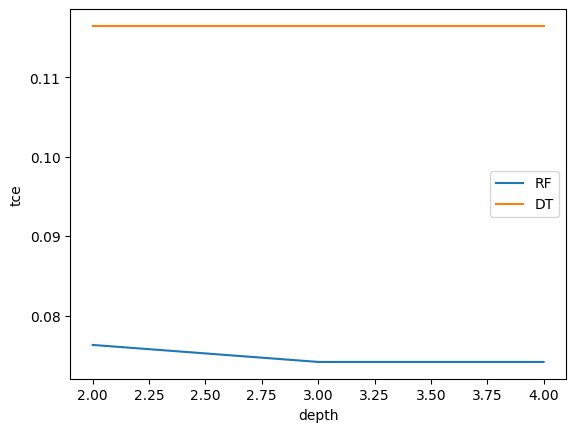

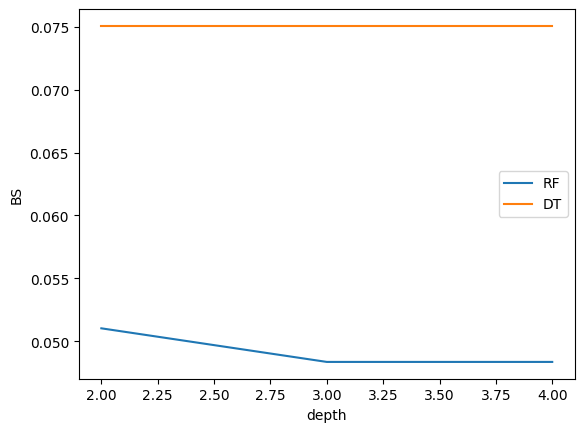

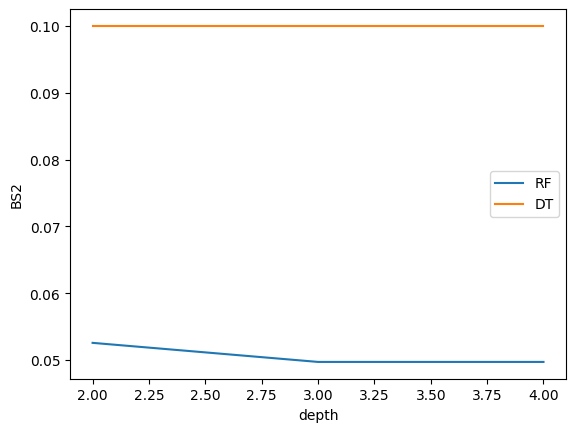

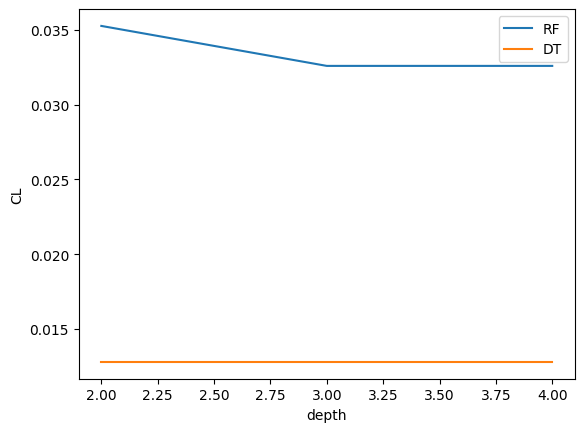

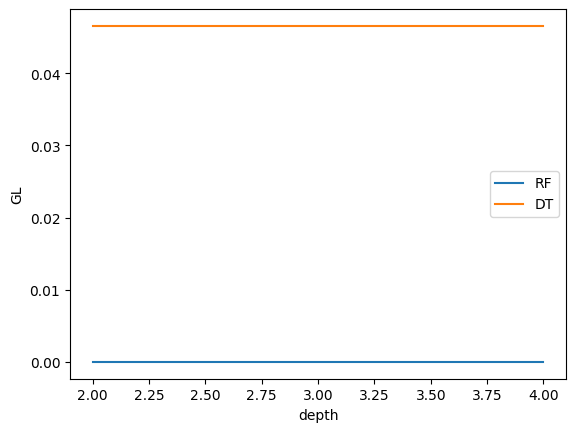

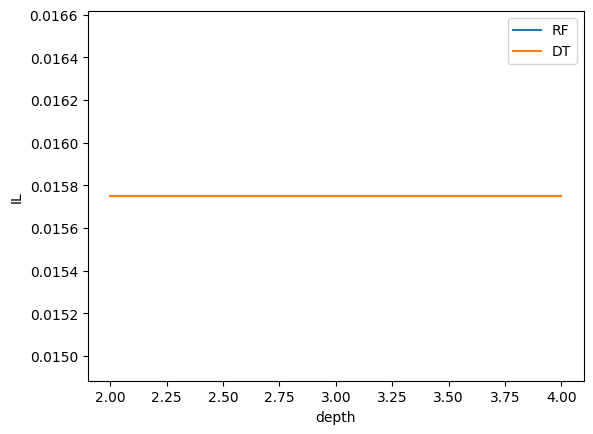

In [11]:
tables_plot = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)
for metric in params["metrics"]:
    ax = tables_plot[metric][plot_calib_methods].plot()
    ax.set_xlabel(exp_key)
    ax.set_ylabel(metric)